In [1]:
from keras.models import load_model

In [2]:
#classnames representing each chessman character
class_names = ['BISHOP', 'KING', 'KNIGHT', 'PAWN', 'QUEEN', 'ROOK']

In [3]:
width = 96
height= 96

In [4]:
#reloading the previous saved model "Chessman_Detector.h5"
model= load_model('Chessman_Detector.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0

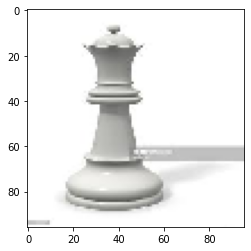

'QUEEN'

In [6]:
from keras import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import cv2

type_1 = preprocessing.image.load_img('./test/sample2.jpg',target_size=(width,height))

plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions= model.predict(type_1_X)

class_names[np.argmax(predictions)]

In [7]:
import time

#get the reference to the webcam
camera=cv2.VideoCapture(0)
camera_height= 500

while(True):
    _,frame=camera.read()
    
    frame=cv2.flip(frame,1)
    
    #rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) #landscape orientation
    frame = cv2.resize(frame, (res, camera_height))
    
    #add rectangle
    cv2.rectangle(frame, (180,75), (550,425), (0, 255,0), 2)
    
    #get ROI
    roi=frame[75+2: 425-2, 150+2 :500-2]
    
    #parse BGR to RGB
    roi=cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
    
    #resize
    roi=cv2.resize(roi, (width,height))
    
    #predict
    roi_X=np.expand_dims(roi,axis=0)
    
    predictions=model.predict(roi_X)
    type_1_pred,type_2_pred,type_3_pred,type_4_pred,type_5_pred,type_6_pred = predictions[0]
    
    #add text
    type_1_text='{}: {}%'.format(class_names[0],int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (70,120),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240,240,240),2)
    
    #add text
    type_2_text='{}: {}%'.format(class_names[1],int(type_2_pred*100))
    cv2.putText(frame, type_2_text, (70,150),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240,240,240),2)
    
    #add text
    type_3_text='{}: {}%'.format(class_names[2],int(type_3_pred*100))
    cv2.putText(frame, type_3_text, (70,180),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240,240,240),2)
    
    #add text
    type_4_text='{}: {}%'.format(class_names[3],int(type_4_pred*100))
    cv2.putText(frame, type_4_text, (70,210),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240,240,240),2)
    
    #add text
    type_5_text='{}: {}%'.format(class_names[4],int(type_5_pred*100))
    cv2.putText(frame, type_5_text, (70,240),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240,240,240),2)
    
    #add text
    type_6_text='{}: {}%'.format(class_names[5],int(type_6_pred*100))
    cv2.putText(frame, type_6_text, (70,270),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240,240,240),2)
    
    #showw the frame
    cv2.imshow("Test out", frame)
    
    key=cv2.waitKey(1)
    
    if key & 0xFF == ord("q"):
        break
        
        
camera.release()
cv2.destroyAllWindows()